# HW5 Problem 6 Implementation

An insurance company assumes that the time $T$ between claims from each of its homeowners' policies is exponentially distributed with unknown parameter  $\lambda$. They would like to estimate $\mathbb{E}[T]$ by averaging the claim times for a number of policies, but this is not very practical, since the time between claims is about 30 years. Their groups of data analysts comes up with two different strategies for estimating $\mathbb{E}[T]$ by taking as samples the information of $100$ customers. Help them see which of the following two strategies is more applicable. 

**Strategy 1.**
Starting from today, wait until all 100 customers make a claim. Let $T_1,\dots, T_{100}$ be time customer $i$ makes a claim. Calculate the empirical average $\hat{t}_1=\frac{1}{100}\sum_{i=1}T_i$ and output $\hat{t}=\hat{t}_1$.

**Strategy 2.**
Divide the customers to $5$ groups of size $20$, let these groups be $G_1, G_2,\dots G_5$.  Starting from today, wait until at least one customer in each group makes a claim. For each group $j$ let $T_{G_j}=\min_{i\in G_j} \{T_{i}\}$. Calculate the empirical average $\hat{t}_2=\frac{1}{5}\sum_{j=1}T_{G_j}$ and output $\hat{t}=c\hat{t}_2$ (coefficient $c$ determined later).

First, we will establish the correctness of strategy 2:

(a) Find $\mathbb{E}[\hat{t}_1]$ in terms of $\lambda$. 

**Answer:**

Given $T_i$ represents the time until customer $i$ makes a claim, and since $T_i$ is exponentially distributed with parameter $\lambda$, we have:

$$ \mathbb{E}[T_i] = \frac{1}{\lambda}.$$

Since 

$$\hat{t}_1 = \frac{1}{100} \sum_{i=1}^{100} T_i,$$

we have

$$\mathbb{E}[\hat{t}_1] = \mathbb{E}\left[\frac{1}{100} \sum_{i=1}^{100} T_i\right],$$

which equals

$$\mathbb{E}[\hat{t}_1] = \frac{1}{100} \sum_{i=1}^{100} \mathbb{E}[T_i]$$

by the linearity of expectation.

Therefore, 

$$\mathbb{E}[\hat{t}_1] = \frac{1}{100} \times 100 \times \frac{1}{\lambda} =  \frac{1}{\lambda}.$$

(b) Assume random variables $X$ and $Y$ both have the exponential distribution with parameter $\lambda$. Write down the CDF of $Z$ where $Z=\min\{X,Y\}$. 

**Answer:**

The CDF $F_Z(z)$ of $Z$ is 
 
$$F_Z(z)=P(Z\leq z) = P(\min\{X,Y\} \leq z) = 1 - P(X > z, Y > z) = 1 - P(X > z)P(Y > z),$$

since $X$ and $Y$ should be independently distributed.

For an exponential random variable with parameter $\lambda$, the probability that it is greater than \( z \) is given by $e^{-\lambda z}$.

This gives
$$F_Z(z)=P(Z\leq z) = 1 - P(X > z)P(Y > z) = 1 - e^{-2 \lambda z}.$$

(c) Generalize your observation for $Z=\min \{X_1,X_2, \dots X_n\}$ where each $X_i$ has the exponential distribution with parameter $\lambda$.

**Answer:**

The CDF $F_Z(z)$ of $Z$ is 
 
$$F_Z(z)=P(Z\leq z) = P(\min\{X1, X_2, \dots, X_n\} \leq z) = 1 - P(X_1 > z, X_2 > z, \dots, X_n > z) = 1 - P(X_1 > z)P(X_2 > z)\dots P(X_n > z),$$

since $X_i$ should be independently distributed.

For an exponential random variable with parameter $\lambda$, the probability that it is greater than \( z \) is given by $e^{-\lambda z}$.

This gives
$$F_Z(z)=P(Z\leq z) = 1 - e^{-n \lambda z}.$$

(d) Find the coefficient  $c$ such that $c\mathbb{E}[\hat{t}_2]=\frac{1}{\lambda}$.

**Answer:**

Given the random variable $Z = \min{X_1, X_2, \dots, X_{20}$ where each $X_i$ has an exponential distribution with parameter $\lambda$, we found that the CDF of \( Z \) is:
\[ F_Z(z) = 1 - e^{-20\lambda z} \], which follows that of exponential distribution with parameter $20 \lambda$.

The expectation of $Z$ is then $\frac{1}{20\lambda}.$

Since $T_{G_j}=\min_{i\in G_j} \{T_{i}\}$, we now have the expectation of $T_{G_j}$ is also $\frac{1}{20\lambda}$.

The empirical average $\hat{t}_2=\frac{1}{5}\sum_{j=1}T_{G_j}$ is therefore

$$\mathbb{E}[\hat{t}_2] = \frac{1}{5} \sum_{j=1}^5 \mathbb{E}[T_{G_j}] = \frac{1}{20\lambda}.$$

Therefore, $\hat{t}=c\hat{t}_2 = 20 \hat{t}_2.$ The coefficient $c$ is 20.

(e) Next, write a program to compare the applicability of both strategies:

- Pick  $\frac{1}{50}\leq \lambda\leq \frac{1}{20}$  uniformly at random. Generate 100 random variables  from exponential distribution with parameter $\lambda$. These numbers will represent the claim time of your customers. 
- Following strategy 1 and 2 output your approximation $\hat{t}$ for  $\mathbb{E}[T]$ and compare the error  $\vert \hat{t}-1/\lambda\vert$ as well as the waiting time for each strategy. 
- Repeat the above steps 10 times and plot your results.

Interation 1
	 lambda: 0.02650664539541464
	Strategy 1:
		 estimate of expectation: 46.45582843624128
		 estimate error: 8.729440012416475
		 waiting time: 4645.582843624128
	Strategy 2:
		 estimate of expectation: 40.396001266365374
		 estimate error: 2.669612842540566
		 waiting time: 10.099000316591344
Interation 2
	 lambda: 0.047446641701419004
	Strategy 1:
		 estimate of expectation: 22.61283069845433
		 estimate error: 1.536523416413491
		 waiting time: 2261.283069845433
	Strategy 2:
		 estimate of expectation: 20.195995810152905
		 estimate error: 0.8803114718879357
		 waiting time: 5.048998952538226
Interation 3
	 lambda: 0.02763380643713044
	Strategy 1:
		 estimate of expectation: 40.697922339786494
		 estimate error: 4.510363370120267
		 waiting time: 4069.7922339786496
	Strategy 2:
		 estimate of expectation: 52.3687403743576
		 estimate error: 16.181181404691372
		 waiting time: 13.0921850935894
Interation 4
	 lambda: 0.04457688506145471
	Strategy 1:
		 estimate of expectat

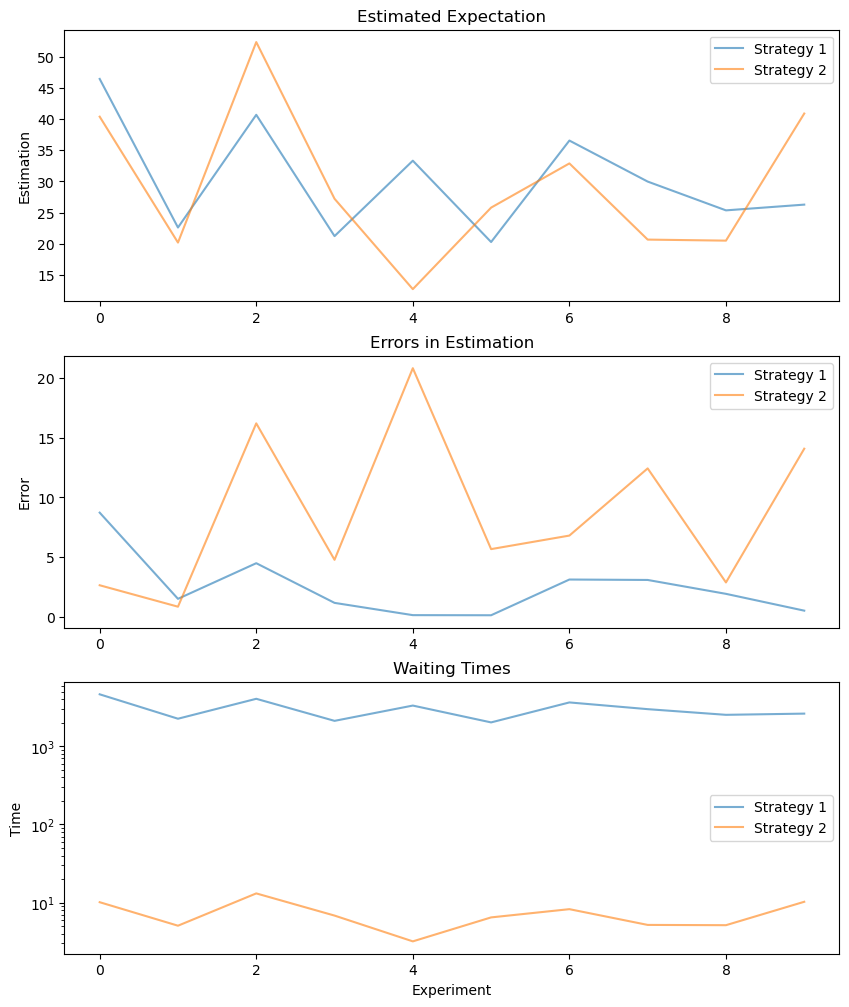

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Initialization
num_experiments = 10

estimate_expectation_strategy1 = []
estimate_expectation_strategy2 = []
errors_strategy1 = []
errors_strategy2 = []
waiting_times_strategy1 = []
waiting_times_strategy2 = []

for k in range(num_experiments):
    print('Interation', k+1)
    # Randomly pick lambda
    lam = np.random.uniform(1/50, 1/20)
    print('\t lambda:', lam)
    # Generate 100 exponential random variables
    claim_times = np.random.exponential(scale=1/lam, size=100)
    
    # Strategy 1
    waiting_time_1 = np.sum(claim_times)
    estimate_1 = waiting_time_1 / 100
    error_1 = abs(estimate_1 - 1/lam)
    print('\tStrategy 1:')
    print('\t\t estimate of expectation:', estimate_1)
    print('\t\t estimate error:', error_1)
    print('\t\t waiting time:', waiting_time_1)
    
    # Strategy 2
    claim_times = claim_times.reshape(5, 20)
    min_claim_times = claim_times.min(axis=1)
    waiting_time_2 = np.sum(min_claim_times)
    estimate_2 = (waiting_time_2 / 5) * 20
    error_2 = abs(estimate_2 - 1/lam)
    print('\tStrategy 2:')
    print('\t\t estimate of expectation:', estimate_2)
    print('\t\t estimate error:', error_2)
    print('\t\t waiting time:', waiting_time_2)
    
    # Append results
    estimate_expectation_strategy1.append(estimate_1)
    estimate_expectation_strategy2.append(estimate_2)
    errors_strategy1.append(error_1)
    errors_strategy2.append(error_2)
    waiting_times_strategy1.append(waiting_time_1)
    waiting_times_strategy2.append(waiting_time_2)

# Plot
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(range(num_experiments), estimate_expectation_strategy1, alpha=0.6, label="Strategy 1")
axs[0].plot(range(num_experiments), estimate_expectation_strategy2, alpha=0.6, label="Strategy 2")
axs[0].set_title("Estimated Expectation")
axs[0].set_ylabel("Estimation")
axs[0].legend()

axs[1].plot(range(num_experiments), errors_strategy1, alpha=0.6, label="Strategy 1")
axs[1].plot(range(num_experiments), errors_strategy2, alpha=0.6, label="Strategy 2")
axs[1].set_title("Errors in Estimation")
axs[1].set_ylabel("Error")
axs[1].legend()

axs[2].plot(range(num_experiments), waiting_times_strategy1, alpha=0.6, label="Strategy 1")
axs[2].plot(range(num_experiments), waiting_times_strategy2, alpha=0.6, label="Strategy 2")
axs[2].set_title("Waiting Times")
axs[2].set_xlabel("Experiment")
axs[2].set_ylabel("Time")
axs[2].semilogy()
axs[2].legend()

(f) In your own words, in what situations is the first estimator preferable to the second, and vice versa?

Hint: Consider varying the value of $\lambda$, as well as different priorities on how accurate the estimate is and long it takes to get it.

**Answer:**

Strategy 1 (waiting for all claims) is preferable when claims are frequent, high accuracy is needed, and there's no urgency in obtaining the estimate. 

Strategy 2 (waiting for the first claim in groups) is preferable when claims are infrequent, moderate accuracy is acceptable, and a quick estimate is essential.

1. Given $\lambda$:
- High $\lambda$ (frequent claims): When claims are frequent, the waiting time Strategy 1 will be relatively short. Therefore, Strategy 1 might be preferable since it directly approximates $\mathbb{E}[T]$ without any scaling factor, which gives less estimation error.
- Low $\lambda$ (infrequent claims): When claims are infrequent, waiting for all 100 customers can take an impractically long time. In this case, Strategy 2 is more appealing because it considerably reduces the waiting time.

2. Accuracy:
- If High Accuracy Needed: If it is important to obtain a highly accurate estimate, Strategy 1 may be preferable since it directly uses the claim times of all 100 customers, which gives less error.
- If Moderate Accuracy Acceptable: Strategy 2 provides a faster estimate based on the earliest claims in groups, which might introduce some bias due to the nature of the exponential distribution. However, with the appropriate scaling factor, this method can still provide a reasonably accurate approximation.

3. Waiting Time:
- Quick Estimate Needed: If a rapid assessment is essential, Strategy 2 is preferred. By focusing on the earliest claimers in smaller groups, the waiting time is much shorter than that for Strategy 2.
- Time Not a Priority: If there's no urgency and one can afford to wait for a more "complete" estimate, Strategy 1 becomes more attractive. It will provide an estimate based on the entire sample, potentially offering a more robust and accurate result.